In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

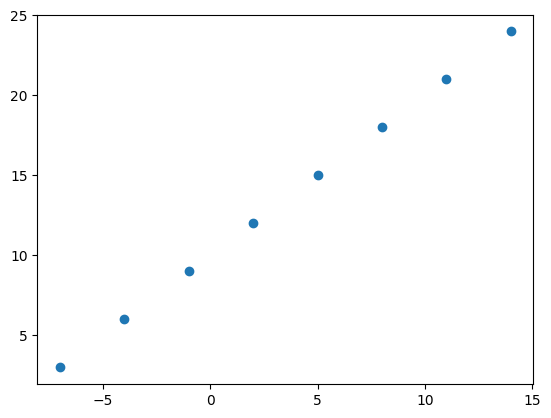

In [7]:
#plotting the data

plt.scatter(X,Y)


In [10]:
# converting numpy features(X,Y) into tensors

X = tf.constant(X)
Y = tf.constant(Y)

X.shape  , Y.shape

(TensorShape([8]), TensorShape([8]))

In [11]:
# features(X,Y) tensor information

X  , Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [42]:
# for performance purpose
X = tf.cast(tf.constant(X) , dtype=tf.float16)
Y = tf.cast(tf.constant(Y) , dtype= tf.float16)

In [43]:
X  ,   Y

(<tf.Tensor: shape=(8,), dtype=float16, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float16)>,
 <tf.Tensor: shape=(8,), dtype=float16, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float16)>)

In [56]:
# from the features, below is the abservation 
   #   Y = X+10
Y == X+10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

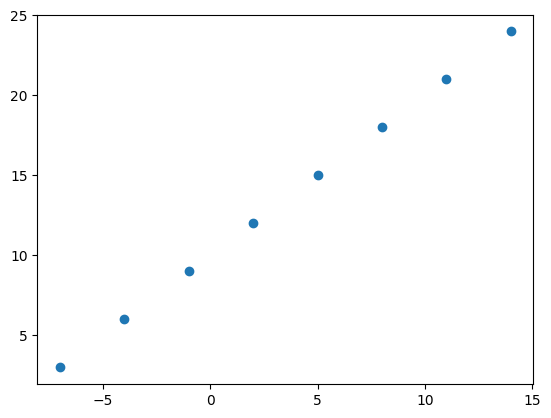

In [44]:
plt.scatter(X , Y)

In [50]:
# Creating regression model

tf.random.set_seed(42)  # set seed for reproduceble results

#1. creating the model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

#2. compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),  # SGD = stochastic Gradient Descent
              metrics = ['mae'])

#3. fitting the model
model.fit(tf.expand_dims(X , axis=-1)  , Y, epochs=22)



Epoch 1/22
1/1 [==============================] - 1s 667ms/step - loss: 10.4933 - mae: 10.4933
Epoch 2/22
1/1 [==============================] - 0s 12ms/step - loss: 10.3608 - mae: 10.3608
Epoch 3/22
1/1 [==============================] - 0s 13ms/step - loss: 10.2283 - mae: 10.2283
Epoch 4/22
1/1 [==============================] - 0s 14ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/22
1/1 [==============================] - 0s 15ms/step - loss: 9.9633 - mae: 9.9633
Epoch 6/22
1/1 [==============================] - 0s 12ms/step - loss: 9.8308 - mae: 9.8308
Epoch 7/22
1/1 [==============================] - 0s 14ms/step - loss: 9.6983 - mae: 9.6983
Epoch 8/22
1/1 [==============================] - 0s 13ms/step - loss: 9.5658 - mae: 9.5658
Epoch 9/22
1/1 [==============================] - 0s 13ms/step - loss: 9.4333 - mae: 9.4333
Epoch 10/22
1/1 [==============================] - 0s 12ms/step - loss: 9.3008 - mae: 9.3008
Epoch 11/22
1/1 [==============================] - 0s 10ms/step - loss

In [52]:
model.predict([17]) # wow, perfect prediction

1/1 [==============================] - 0s 218ms/step


array([[27.913815]], dtype=float32)

In [57]:
model.predict([100])  # expected val=110, try to improce the model.

1/1 [==============================] - 0s 103ms/step


array([[163.1248]], dtype=float32)

# improving the model

Common ways to improve the model

1. Adding layers
2. Increase the number of hidden layers

3. Change the activation function

4. Change the optimization function

5. change the learning_rate value

6. fitting more on data

7. fitting for longer

  All the above are hyper parmeter values

In [72]:
tf.random.set_seed(42)
# 1. Model creation
model_1 = tf.keras.Sequential([
            tf.keras.layers.Dense(100, activation='relu'), 
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

#3. Fitting the model
model_1.fit(tf.expand_dims(X, axis=-1), Y, epochs=40)

Epoch 1/40
1/1 [==============================] - 1s 1s/step - loss: 13.1355 - mae: 13.1355
Epoch 2/40
1/1 [==============================] - 0s 14ms/step - loss: 12.9029 - mae: 12.9029
Epoch 3/40
1/1 [==============================] - 0s 12ms/step - loss: 12.6815 - mae: 12.6815
Epoch 4/40
1/1 [==============================] - 0s 11ms/step - loss: 12.4256 - mae: 12.4256
Epoch 5/40
1/1 [==============================] - 0s 13ms/step - loss: 12.1319 - mae: 12.1319
Epoch 6/40
1/1 [==============================] - 0s 10ms/step - loss: 11.7856 - mae: 11.7856
Epoch 7/40
1/1 [==============================] - 0s 13ms/step - loss: 11.3818 - mae: 11.3818
Epoch 8/40
1/1 [==============================] - 0s 13ms/step - loss: 10.9174 - mae: 10.9174
Epoch 9/40
1/1 [==============================] - 0s 13ms/step - loss: 10.5048 - mae: 10.5048
Epoch 10/40
1/1 [==============================] - 0s 14ms/step - loss: 9.9820 - mae: 9.9820
Epoch 11/40
1/1 [==============================] - 0s 11ms/step

In [75]:
model_1.predict([17])

1/1 [==============================] - 0s 82ms/step


array([[31.870058]], dtype=float32)

In [76]:
model_1.predict([100])

1/1 [==============================] - 0s 93ms/step


array([[181.04918]], dtype=float32)

In [89]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(100 , activation='relu')),
model_2.add(tf.keras.layers.Dense(100 , activation='relu')),
model_2.add(tf.keras.layers.Dense(100 , activation='relu')),
model_2.add(tf.keras.layers.Dense(100 , activation='relu')),
model_2.add(tf.keras.layers.Dense(1))


model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["mae"])
model_2.fit(tf.expand_dims(X , axis=-1) , Y , epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 13.3751 - mae: 13.3751
Epoch 2/30
1/1 [==============================] - 0s 14ms/step - loss: 11.1123 - mae: 11.1123
Epoch 3/30
1/1 [==============================] - 0s 15ms/step - loss: 7.6690 - mae: 7.6690
Epoch 4/30
1/1 [==============================] - 0s 15ms/step - loss: 5.7031 - mae: 5.7031
Epoch 5/30
1/1 [==============================] - 0s 14ms/step - loss: 5.2215 - mae: 5.2215
Epoch 6/30
1/1 [==============================] - 0s 14ms/step - loss: 3.8896 - mae: 3.8896
Epoch 7/30
1/1 [==============================] - 0s 13ms/step - loss: 4.3963 - mae: 4.3963
Epoch 8/30
1/1 [==============================] - 0s 13ms/step - loss: 3.6193 - mae: 3.6193
Epoch 9/30
1/1 [==============================] - 0s 13ms/step - loss: 4.1360 - mae: 4.1360
Epoch 10/30
1/1 [==============================] - 0s 9ms/step - loss: 4.1302 - mae: 4.1302
Epoch 11/30
1/1 [==============================] - 0s 13ms/step - loss: 3.5178

In [92]:
model_2.predict([17])

1/1 [==============================] - 0s 90ms/step


array([[30.294874]], dtype=float32)

In [112]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(150 , activation='relu')),
model_3.add(tf.keras.layers.Dense(150 , activation='relu')),
model_3.add(tf.keras.layers.Dense(150 , activation='relu')),
model_3.add(tf.keras.layers.Dense(150 , activation='relu')),
model_3.add(tf.keras.layers.Dense(1))


model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics = ["mae"])
model_3.fit(tf.expand_dims(X , axis=-1) , Y , epochs=45)

Epoch 1/45
1/1 [==============================] - 1s 1s/step - loss: 13.2306 - mae: 13.2306
Epoch 2/45
1/1 [==============================] - 0s 8ms/step - loss: 7.6139 - mae: 7.6139
Epoch 3/45
1/1 [==============================] - 0s 9ms/step - loss: 11.1457 - mae: 11.1457
Epoch 4/45
1/1 [==============================] - 0s 6ms/step - loss: 11.4856 - mae: 11.4856
Epoch 5/45
1/1 [==============================] - 0s 8ms/step - loss: 10.2835 - mae: 10.2835
Epoch 6/45
1/1 [==============================] - 0s 10ms/step - loss: 7.1157 - mae: 7.1157
Epoch 7/45
1/1 [==============================] - 0s 8ms/step - loss: 5.5646 - mae: 5.5646
Epoch 8/45
1/1 [==============================] - 0s 6ms/step - loss: 5.9537 - mae: 5.9537
Epoch 9/45
1/1 [==============================] - 0s 10ms/step - loss: 3.5536 - mae: 3.5536
Epoch 10/45
1/1 [==============================] - 0s 4ms/step - loss: 5.4678 - mae: 5.4678
Epoch 11/45
1/1 [==============================] - 0s 6ms/step - loss: 4.5245 - 

In [113]:
model_3.predict([17])

1/1 [==============================] - 0s 94ms/step


array([[24.299427]], dtype=float32)

In [ ]:
#4. evaluating the metrics


#5. predictions for new data

In [114]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(1, input_shape=[1])),
model_4.add(tf.keras.layers.Dense(150 , activation='relu')),
model_4.add(tf.keras.layers.Dense(150 , activation='relu')),
model_4.add(tf.keras.layers.Dense(150 , activation='relu')),
model_4.add(tf.keras.layers.Dense(1))


model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics = ["mae"])
model_4.fit(X , Y , epochs=45)

Epoch 1/45
1/1 [==============================] - 1s 1s/step - loss: 13.5450 - mae: 13.5450
Epoch 2/45
1/1 [==============================] - 0s 7ms/step - loss: 8.2865 - mae: 8.2865
Epoch 3/45
1/1 [==============================] - 0s 10ms/step - loss: 12.3571 - mae: 12.3571
Epoch 4/45
1/1 [==============================] - 0s 9ms/step - loss: 5.8070 - mae: 5.8070
Epoch 5/45
1/1 [==============================] - 0s 9ms/step - loss: 6.9567 - mae: 6.9567
Epoch 6/45
1/1 [==============================] - 0s 7ms/step - loss: 7.9997 - mae: 7.9997
Epoch 7/45
1/1 [==============================] - 0s 11ms/step - loss: 6.6751 - mae: 6.6751
Epoch 8/45
1/1 [==============================] - 0s 10ms/step - loss: 3.8890 - mae: 3.8890
Epoch 9/45
1/1 [==============================] - 0s 8ms/step - loss: 4.8442 - mae: 4.8442
Epoch 10/45
1/1 [==============================] - 0s 7ms/step - loss: 5.1040 - mae: 5.1040
Epoch 11/45
1/1 [==============================] - 0s 8ms/step - loss: 3.9334 - mae

In [116]:
model_4.predict([100])

1/1 [==============================] - 0s 31ms/step


array([[125.64337]], dtype=float32)

In [ ]:
#Referrence : https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb